# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_file = os.path.join("..","output","cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []



# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Loop through the cities list and add each city to the URL in the request
#loop through one city at a time and make sure the code works

In [5]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [6]:
# Get latitude and temperature for cities
cities = cities[0:601]

#set up lists to hold reponse info
#we need more data than latitude and temp for the hw 
lat = []
temp = []
humidity = []
cloudiness = []
wind_speed = []
date = []
lng = []
cities_list = []
country_code = []
counter = 0
set_list = 1
t = 10

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    counter += 1
    try:
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response["dt"])
        country_code.append(response['sys']['country'])
        cities_list.append(city)
        print(f'Processing Record {counter} of Set {set_list} | {city}')
    except KeyError:
        print("This city does not exist")
        pass
    
    if counter >= 50:
        time.sleep(t)
        counter = 0
        set_list += 1
        print(f'The program paused for {t} seconds')

# # print(f"The latitude information received is: {lat}")
# # print(f"The temperature information received is: {temp}")


Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | victoria
Processing Record 5 of Set 1 | aneho
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | bhimunipatnam
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | alpena
This city does not exist
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | seddon
Processing Record 14 of Set 1 | udachnyy
Processing Record 15 of Set 1 | tukrah
Processing Record 16 of Set 1 | tuy hoa
Processing Record 17 of Set 1 | qaanaaq
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | eruwa
Processing Record 22 of Set 1 | geraldton
Processing Record 23 of Set 1 | kapaa
Processing Record 24 of Set 1 | iquitos
Processing Record 25 of Set 1 | busselton
Processing 

Processing Record 4 of Set 5 | cidreira
Processing Record 5 of Set 5 | khuzhir
This city does not exist
Processing Record 7 of Set 5 | gananoque
Processing Record 8 of Set 5 | cabo san lucas
Processing Record 9 of Set 5 | hope
Processing Record 10 of Set 5 | nazarovo
Processing Record 11 of Set 5 | bolobo
Processing Record 12 of Set 5 | arraial do cabo
Processing Record 13 of Set 5 | saint-louis
Processing Record 14 of Set 5 | chake chake
This city does not exist
Processing Record 16 of Set 5 | jamestown
Processing Record 17 of Set 5 | antofagasta
Processing Record 18 of Set 5 | nemuro
Processing Record 19 of Set 5 | bratsk
Processing Record 20 of Set 5 | halifax
Processing Record 21 of Set 5 | naze
Processing Record 22 of Set 5 | la ronge
Processing Record 23 of Set 5 | smithers
Processing Record 24 of Set 5 | kavieng
Processing Record 25 of Set 5 | shambu
Processing Record 26 of Set 5 | gizo
Processing Record 27 of Set 5 | cairns
Processing Record 28 of Set 5 | gajendragarh
Processin

Processing Record 8 of Set 9 | puerto montt
Processing Record 9 of Set 9 | garavuti
Processing Record 10 of Set 9 | hambantota
This city does not exist
Processing Record 12 of Set 9 | palia kalan
Processing Record 13 of Set 9 | bonavista
Processing Record 14 of Set 9 | makasar
Processing Record 15 of Set 9 | honiara
Processing Record 16 of Set 9 | pacific grove
Processing Record 17 of Set 9 | pangnirtung
Processing Record 18 of Set 9 | wewak
Processing Record 19 of Set 9 | peniche
Processing Record 20 of Set 9 | cumberland
Processing Record 21 of Set 9 | bulancak
Processing Record 22 of Set 9 | salinopolis
Processing Record 23 of Set 9 | gornyak
Processing Record 24 of Set 9 | nuevo progreso
Processing Record 25 of Set 9 | miri
Processing Record 26 of Set 9 | brive-la-gaillarde
Processing Record 27 of Set 9 | verkhnyaya inta
Processing Record 28 of Set 9 | karpathos
Processing Record 29 of Set 9 | lere
Processing Record 30 of Set 9 | chara
Processing Record 31 of Set 9 | mwingi
Process

In [7]:
print(len(cities_list), len(temp), len(humidity),len(cloudiness), len(lat), len(date), len(wind_speed),len(country_code))

551 551 551 551 551 551 551 551


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
import datetime
city_data = pd.DataFrame({"City Name":cities_list,"Country Code":country_code,"Date (UTC)":date,"Latitude":lat, "Longitude":lng,"Temperature (F)":temp,"Humidity (%)":humidity,"Cloudiness (%)":cloudiness,"Wind Speed (MPH)":wind_speed})
city_data["City Name"] = [city.title() for city in city_data["City Name"]]
city_data["Date (UTC)"] = [datetime.datetime.utcfromtimestamp(date) for date in city_data["Date (UTC)"]]
city_data.to_csv(output_file)
city_data

,City Name,Country Code,Date (UTC),Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (MPH)
0,Port Elizabeth,ZA,2020-04-10 22:51:23,-33.92,25.57,59.00,100,75,3.36
1,Atuona,PF,2020-04-10 22:53:46,-9.80,-139.03,82.24,78,79,11.10
2,Vaini,TO,2020-04-10 22:53:46,-21.20,-175.20,80.60,69,40,11.41
3,Victoria,HK,2020-04-10 22:50:50,22.29,114.16,70.57,88,40,14.99
4,Aneho,TG,2020-04-10 22:53:46,6.23,1.60,82.40,88,20,4.70
...,...,...,...,...,...,...,...,...,...
546,Qandala,SO,2020-04-10 22:56:11,11.47,49.87,82.18,65,0,7.99
547,Kaduqli,SD,2020-04-10 22:56:11,11.02,29.72,80.11,14,87,2.57
548,Pangkalanbuun,ID,2020-04-10 22:53:33,-2.68,111.62,77.43,94,98,2.59
549,La Palma,US,2020-04-10 22:56:11,33.85,-118.05,59.54,48,75,10.29


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

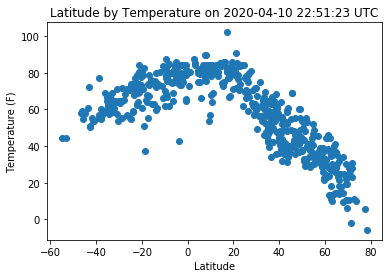

In [87]:
city_lat = city_data["Latitude"]
city_temp = city_data["Temperature (F)"]
city_date = city_data["Date (UTC)"]

plt.scatter(city_lat,city_temp)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.title(f"Latitude by Temperature on {city_date[0]} UTC")
plt.savefig("../output/Lat_Temp_fig.png")
plt.show()

In [88]:
# After each plot add a sentence or too explaining what the code is and analyzing.

#### Latitude vs. Humidity Plot

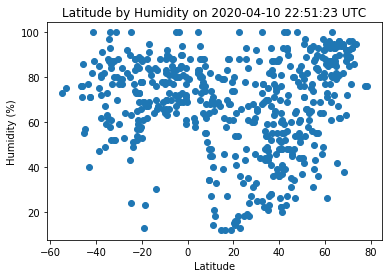

In [89]:
city_humidity = city_data["Humidity (%)"]

plt.scatter(city_lat,city_humidity)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"Latitude by Humidity on {city_date[0]} UTC")
plt.savefig("../output/Lat_Hum_fig.png")
plt.show()

In [90]:
# After each plot add a sentence or too explaining what the code is and analyzing.

#### Latitude vs. Cloudiness Plot

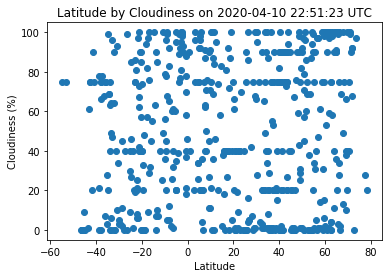

In [91]:
city_cloudiness = city_data["Cloudiness (%)"]

plt.scatter(city_lat,city_cloudiness)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"Latitude by Cloudiness on {city_date[0]} UTC")
plt.savefig("../output/Lat_Cloud_fig.png")
plt.show()

In [92]:
# After each plot add a sentence or too explaining what the code is and analyzing.

#### Latitude vs. Wind Speed Plot

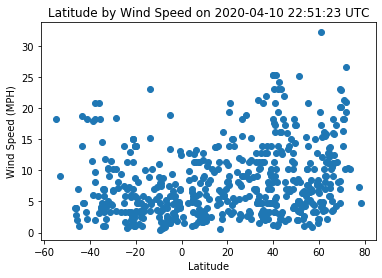

In [93]:
city_windspeed = city_data["Wind Speed (MPH)"]

plt.scatter(city_lat,city_windspeed)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.title(f"Latitude by Wind Speed on {city_date[0]} UTC")
plt.savefig("../output/Lat_Wind_fig.png")
plt.show()

In [94]:
# After each plot add a sentence or too explaining what the code is and analyzing.

## Linear Regression

In [19]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemp = city_data.loc[city_data["Latitude"]>=0,:]
Southern_hemp = city_data.loc[city_data["Latitude"]<0,:]

#Creating series for variables in the northern hemisphere
Northern_city_lat = Northern_hemp["Latitude"]
Northern_city_temp = Northern_hemp["Temperature (F)"]
Northern_city_hum = Northern_hemp["Humidity (%)"]
Northern_city_cloud = Northern_hemp["Cloudiness (%)"]
Northern_city_wind = Northern_hemp["Wind Speed (MPH)"]

#Creating series for variables in the southern hemisphere
Southern_city_lat = Southern_hemp["Latitude"]
Southern_city_temp = Southern_hemp["Temperature (F)"]
Southern_city_hum = Southern_hemp["Humidity (%)"]
Southern_city_cloud = Southern_hemp["Cloudiness (%)"]
Southern_city_wind = Southern_hemp["Wind Speed (MPH)"]


In [68]:
# OPTIONAL: Create a function to create Linear Regression plots
def linearregression(x_values,y_values,x_label,y_label,x_annotate,y_annotate):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xlim(min(x_values)-2,max(x_values)+2)
    plt.ylim(min(y_values)-2,max(y_values)+2)
    if x_annotate >= 0:
        hemisphere_name = "Northern"
    else:
        hemisphere_name = "Southern"
    plt.title(f'{x_label} vs. {y_label} in the {hemisphere_name} Hemisphere')
    print(f"The r-squared is: {round(rvalue**2,2)}")
    print(line_eq)
    plt.show()


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.83
y = -1.0x + 91.88


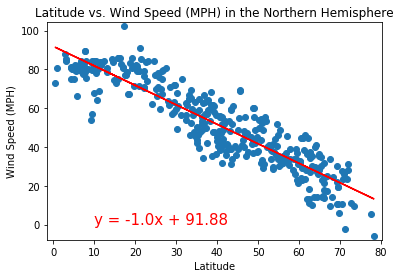

In [69]:
linearregression(Northern_city_lat,Northern_city_temp,"Latitude","Wind Speed (MPH)",10,0)

In [70]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.46
y = 0.52x + 79.95


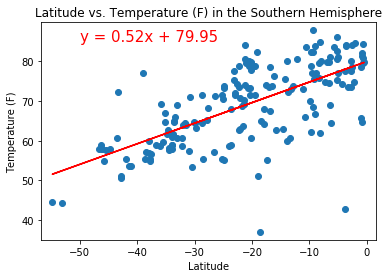

In [71]:
linearregression(Southern_city_lat,Southern_city_temp,"Latitude", "Temperature (F)",-50,85)


In [72]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.1
y = 0.36x + 51.25


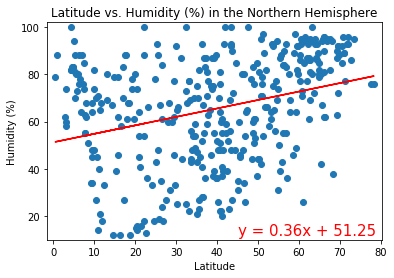

In [76]:
linearregression(Northern_city_lat,Northern_city_hum,"Latitude","Humidity (%)",45,12)

In [77]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.01
y = 0.1x + 76.14


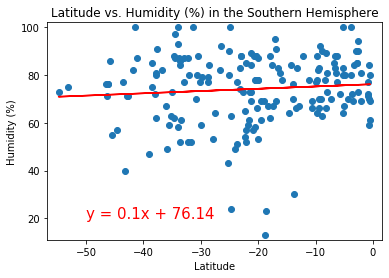

In [78]:
linearregression(Southern_city_lat,Southern_city_hum,"Latitude","Humidity (%)",-50,20)

In [79]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.01
y = 0.18x + 42.62


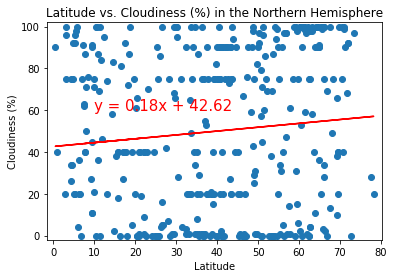

In [80]:
linearregression(Northern_city_lat,Northern_city_cloud,"Latitude","Cloudiness (%)",10,60)

In [81]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06
y = 0.61x + 60.9


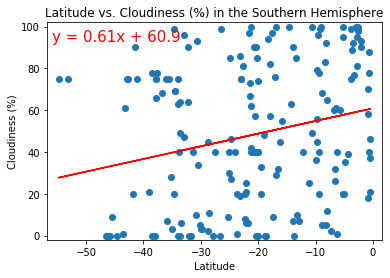

In [82]:
linearregression(Southern_city_lat,Southern_city_cloud,"Latitude","Cloudiness (%)",-56,93)

In [83]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.05
y = 0.07x + 6.34


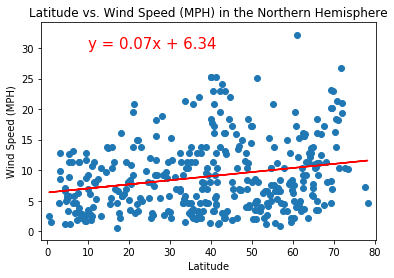

In [84]:
linearregression(Northern_city_lat,Northern_city_wind,"Latitude","Wind Speed (MPH)",10,30)

In [85]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.04
y = -0.07x + 5.02


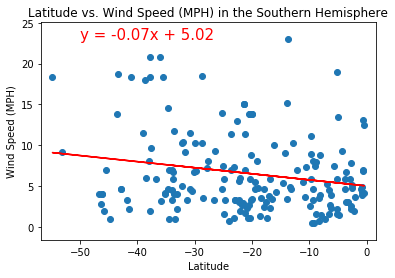

In [86]:
linearregression(Southern_city_lat,Southern_city_wind,"Latitude","Wind Speed (MPH)",-50,23)

In [36]:
#After each pair of plots explain what the linear regression is modeling
#such as any relationships you notice and any other analysis you may have.